In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium

# Load the data
data = pd.read_csv("C:\\Users\\KIIT\\Downloads\\electric_vehicle_charging_station_list.csv")
data2 = pd.read_csv("C:\\Users\\KIIT\\Downloads\\ElectricCarData_Norm.csv")

In [2]:
data.shape

(202, 9)

In [3]:
data.isnull().any()

no            False
region        False
address       False
aux addres    False
latitude      False
longitude     False
type          False
power         False
service       False
dtype: bool

In [4]:
data.head

<bound method NDFrame.head of       no region                                            address   
0      1   NDMC  Prithviraj Market, Rabindra Nagar, New Delhi- ...  \
1      2   NDMC  Prithviraj Market, Rabindra Nagar, New Delhi- ...   
2      3   NDMC  Outside RWA Park, Jor Bagh Market, Jor Bagh Co...   
3      4   NDMC  Opposite Dory Pharmacy, Khanna Market, Aliganj...   
4      5   NDMC  Opposite Goel Opticals, Khanna Market, Aliganj...   
..   ...    ...                                                ...   
197  198  ANERT  State Council For Child Welfare, CV Raman Pill...   
198  199  ANERT  Shanghumukham beach, thiruvananthapuram,Kerala...   
199  200  ANERT  KTDC Tourist Reception Centre Shanmugham road,...   
200  201  ANERT  State Council For Child Welfare, CV Raman Pill...   
201  202   SDMC  EESL PVR Priya Vasant Vihar, SDMC parking New ...   

                                            aux addres   latitude  longitude   
0    Electric Vehicle Charger, Prithviraj Market,

## Charging Station Types:

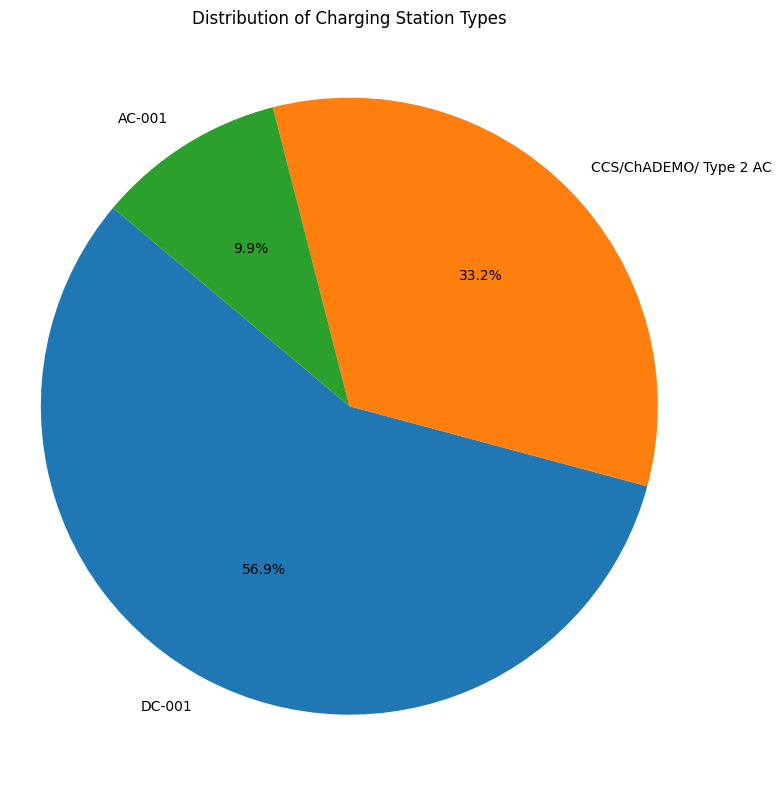

In [5]:
# Create a pie chart of the distribution of charging station types
station_types = data['type'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(station_types, labels=station_types.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Charging Station Types')
plt.axis('equal')
plt.tight_layout()
plt.show()

## Charging Station Power and Service:

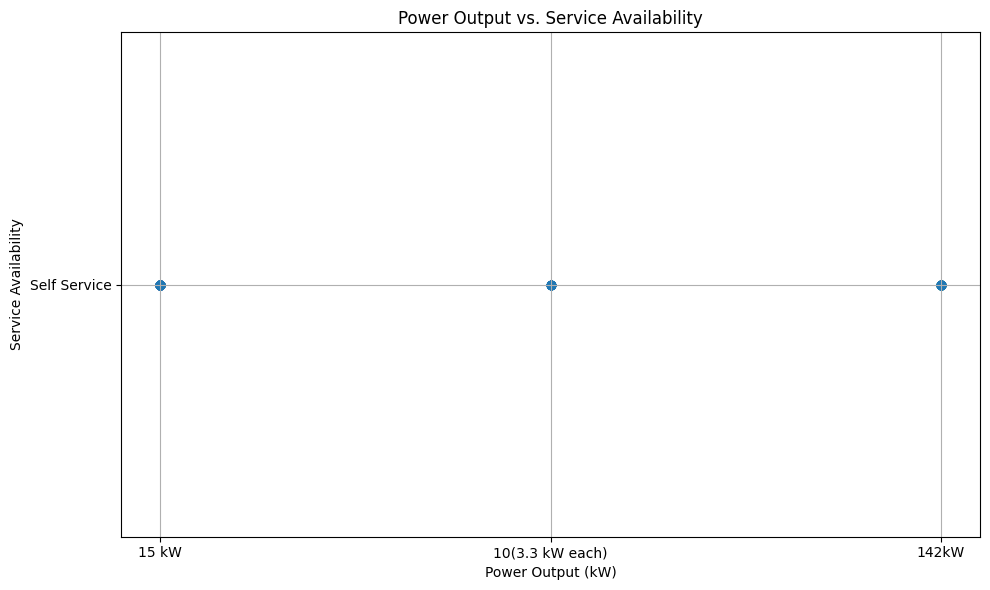

In [6]:
# Scatter plot of power output vs. service availability
plt.figure(figsize=(10, 6))
plt.scatter(data['power'], data['service'], alpha=0.5)
plt.title('Power Output vs. Service Availability')
plt.xlabel('Power Output (kW)')
plt.ylabel('Service Availability')
plt.grid(True)
plt.tight_layout()
plt.show()


## Charging Station Regions:

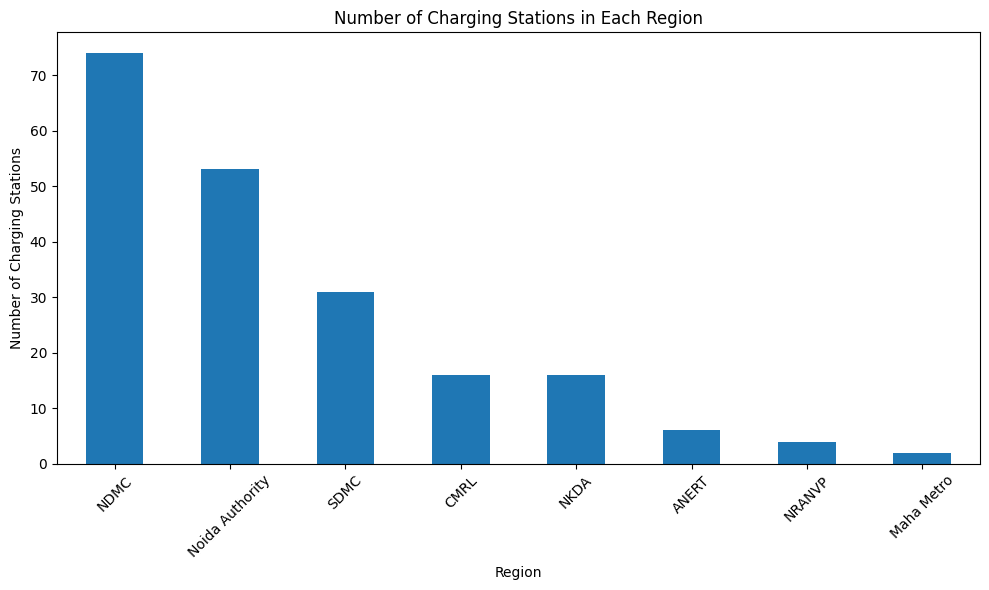

In [7]:
# Bar chart of the number of charging stations in each region
region_counts = data['region'].value_counts()
plt.figure(figsize=(10, 6))
region_counts.plot(kind='bar')
plt.title('Number of Charging Stations in Each Region')
plt.xlabel('Region')
plt.ylabel('Number of Charging Stations')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## Charging Station Locations:

In [8]:
# Create a map centered around the mean latitude and longitude
station_map = folium.Map(location=[data['latitude'].mean(), data['longitude'].mean()], zoom_start=6)

# Add markers for each charging station location
for index, row in data.iterrows():
    folium.Marker([row['latitude'], row['longitude']], popup=row['address']).add_to(station_map)

# Display the map
station_map


## Charging Station Power Distribution:

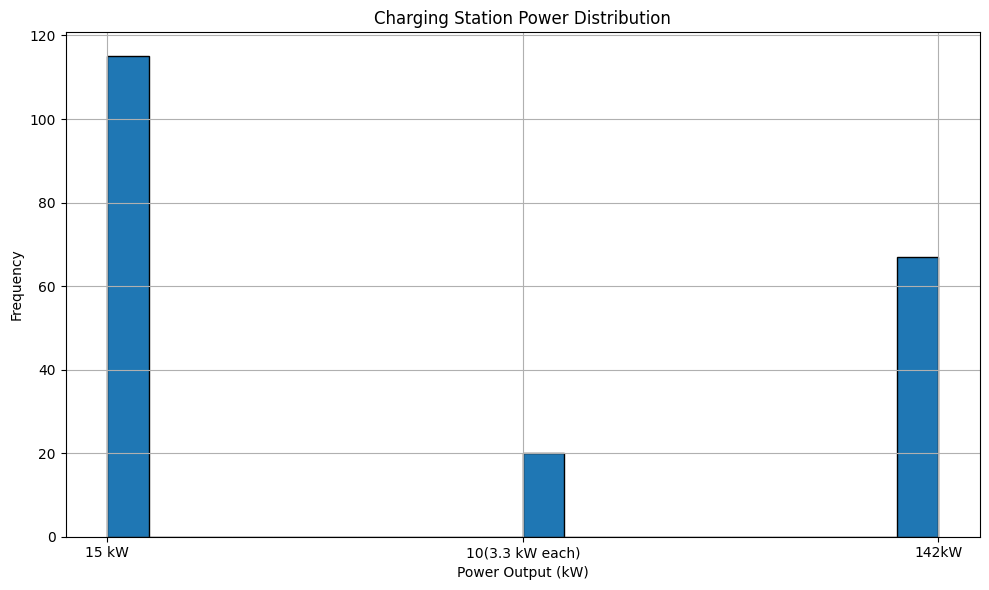

In [9]:
# Histogram of charging station power distribution
plt.figure(figsize=(10, 6))
plt.hist(data['power'], bins=20, edgecolor='black')
plt.title('Charging Station Power Distribution')
plt.xlabel('Power Output (kW)')
plt.ylabel('Frequency')
plt.grid(True)
plt.tight_layout()
plt.show()


## Charging Station Service Availability:

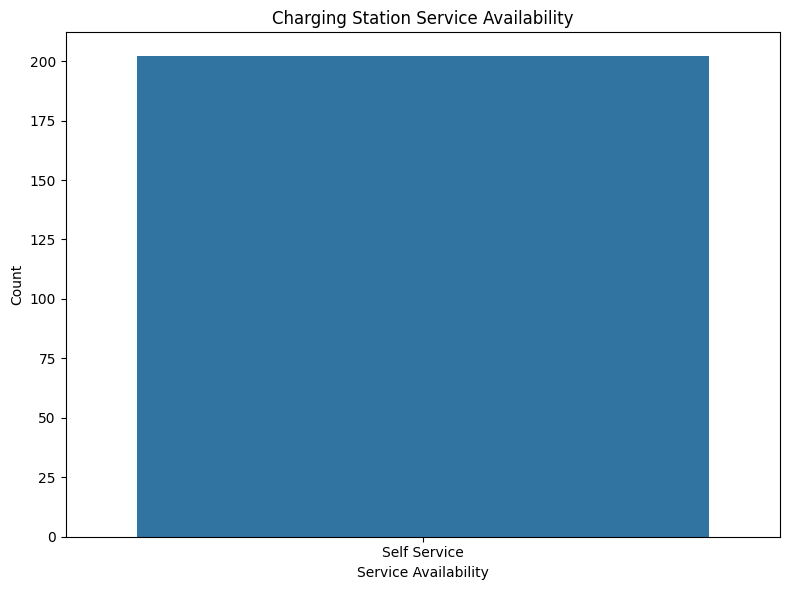

In [10]:
# Count plot of service availability
plt.figure(figsize=(8, 6))
sns.countplot(data=data, x='service')
plt.title('Charging Station Service Availability')
plt.xlabel('Service Availability')
plt.ylabel('Count')
plt.tight_layout()
plt.show()


## Charging Station Locations by Region:

In [11]:
# Define colors for each region
region_colors = {'North': 'blue', 'South': 'green', 'East': 'red', 'West': 'purple'}

# Create a map with markers colored by region
station_map_region = folium.Map(location=[data['latitude'].mean(), data['longitude'].mean()], zoom_start=6)

def get_region_color(region):
    return region_colors.get(region, 'gray')  # Default to gray if region is not found in dictionary

for index, row in data.iterrows():
    folium.CircleMarker(
        location=[row['latitude'], row['longitude']],
        radius=5,
        popup=row['address'],
        color=get_region_color(row['region']),
        fill=True,
        fill_color=get_region_color(row['region']),
        fill_opacity=0.7
    ).add_to(station_map_region)

# Display the map
station_map_region


In [12]:
data2.shape

(103, 14)

In [13]:
data2.isnull().any()

Brand          False
Model          False
Accel          False
TopSpeed       False
Range          False
Efficiency     False
FastCharge     False
RapidCharge    False
PowerTrain     False
PlugType       False
BodyStyle      False
Segment        False
Seats          False
PriceEuro      False
dtype: bool

In [14]:
data2.head(10)

,Brand,Model,Accel,TopSpeed,Range,Efficiency,FastCharge,RapidCharge,PowerTrain,PlugType,BodyStyle,Segment,Seats,PriceEuro
0,Tesla,Model 3 Long Range Dual Motor,4.6 sec,233 km/h,450 km,161 Wh/km,940 km/h,Rapid charging possible,All Wheel Drive,Type 2 CCS,Sedan,D,5,55480
1,Volkswagen,ID.3 Pure,10.0 sec,160 km/h,270 km,167 Wh/km,250 km/h,Rapid charging possible,Rear Wheel Drive,Type 2 CCS,Hatchback,C,5,30000
2,Polestar,2,4.7 sec,210 km/h,400 km,181 Wh/km,620 km/h,Rapid charging possible,All Wheel Drive,Type 2 CCS,Liftback,D,5,56440
3,BMW,iX3,6.8 sec,180 km/h,360 km,206 Wh/km,560 km/h,Rapid charging possible,Rear Wheel Drive,Type 2 CCS,SUV,D,5,68040
4,Honda,e,9.5 sec,145 km/h,170 km,168 Wh/km,190 km/h,Rapid charging possible,Rear Wheel Drive,Type 2 CCS,Hatchback,B,4,32997
5,Lucid,Air,2.8 sec,250 km/h,610 km,180 Wh/km,620 km/h,Rapid charging possible,All Wheel Drive,Type 2 CCS,Sedan,F,5,105000
6,Volkswagen,e-Golf,9.6 sec,150 km/h,190 km,168 Wh/km,220 km/h,Rapid charging possible,Front Wheel Drive,Type 2 CCS,Hatchback,C,5,31900
7,Peugeot,e-208,8.1 sec,150 km/h,275 km,164 Wh/km,420 km/h,Rapid charging possible,Front Wheel Drive,Type 2 CCS,Hatchback,B,5,29682
8,Tesla,Model 3 Standard Range Plus,5.6 sec,225 km/h,310 km,153 Wh/km,650 km/h,Rapid charging possible,Rear Wheel Drive,Type 2 CCS,Sedan,D,5,46380
9,Audi,Q4 e-tron,6.3 sec,180 km/h,400 km,193 Wh/km,540 km/h,Rapid charging possible,All Wheel Drive,Type 2 CCS,SUV,D,5,55000


In [15]:
data2['PowerTrain'].unique()

array(['All Wheel Drive', 'Rear Wheel Drive', 'Front Wheel Drive'],
      dtype=object)

In [16]:
data2['BodyStyle'].unique()

array(['Sedan', 'Hatchback', 'Liftback', 'SUV', 'Pickup', 'MPV', 'Cabrio',
       'SPV', 'Station'], dtype=object)

In [17]:
data2['FastCharge'].unique()

array(['940 km/h', '250 km/h', '620 km/h', '560 km/h', '190 km/h',
       '220 km/h', '420 km/h', '650 km/h', '540 km/h', '440 km/h',
       '230 km/h', '380 km/h', '210 km/h', '590 km/h', '780 km/h',
       '170 km/h', '260 km/h', '930 km/h', '850 km/h', '910 km/h',
       '490 km/h', '470 km/h', '270 km/h', '450 km/h', '350 km/h',
       '710 km/h', '240 km/h', '390 km/h', '570 km/h', '610 km/h',
       '340 km/h', '730 km/h', '920 km/h', '-', '550 km/h', '900 km/h',
       '520 km/h', '430 km/h', '890 km/h', '410 km/h', '770 km/h',
       '460 km/h', '360 km/h', '810 km/h', '480 km/h', '290 km/h',
       '330 km/h', '740 km/h', '510 km/h', '320 km/h', '500 km/h'],
      dtype=object)

In [18]:
data2['RapidCharge'].unique()

array(['Rapid charging possible', 'Rapid charging not possible'],
      dtype=object)

In [19]:
data2['Segment'].unique()

array(['D', 'C', 'B', 'F', 'A', 'E', 'N', 'S'], dtype=object)

In [20]:
data2['PlugType'].unique()

array(['Type 2 CCS', 'Type 2 CHAdeMO', 'Type 2', 'Type 1 CHAdeMO'],
      dtype=object)

In [21]:
data2[['FastCharge','TopSpeed','Range','Efficiency','Accel']] = data2[['FastCharge','TopSpeed','Range','Efficiency','Accel']].replace(to_replace=r'([a-z/]+|[A-Z/]+)', value='', regex=True)

In [22]:
data2['FastCharge']=data2['FastCharge'].str.replace('-','0')   
data2['FastCharge']=data2['FastCharge'].astype(float)
data2['FastCharge'].mean()

434.56310679611653

In [23]:
data2['FastCharge']=data2['FastCharge'].replace(0,434.56)
data2['FastCharge'].unique()

array([940.  , 250.  , 620.  , 560.  , 190.  , 220.  , 420.  , 650.  ,
       540.  , 440.  , 230.  , 380.  , 210.  , 590.  , 780.  , 170.  ,
       260.  , 930.  , 850.  , 910.  , 490.  , 470.  , 270.  , 450.  ,
       350.  , 710.  , 240.  , 390.  , 570.  , 610.  , 340.  , 730.  ,
       920.  , 434.56, 550.  , 900.  , 520.  , 430.  , 890.  , 410.  ,
       770.  , 460.  , 360.  , 810.  , 480.  , 290.  , 330.  , 740.  ,
       510.  , 320.  , 500.  ])

## Acceleration (Accel) vs Price (PriceEuro):

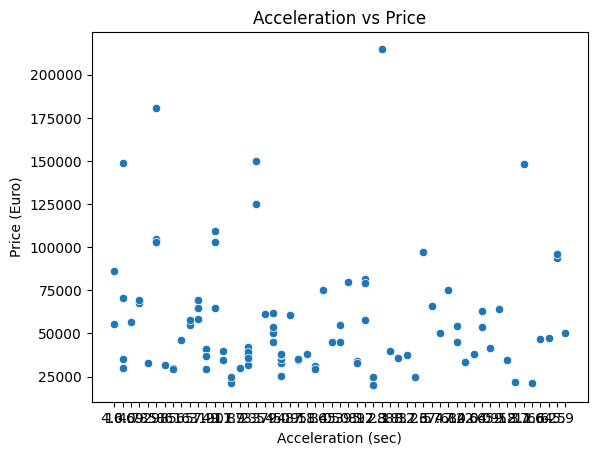

In [24]:
sns.scatterplot(data=data2, x='Accel', y='PriceEuro')
plt.xlabel('Acceleration (sec)')
plt.ylabel('Price (Euro)')
plt.title('Acceleration vs Price')
plt.show()

## Distribution of Seats and Price:

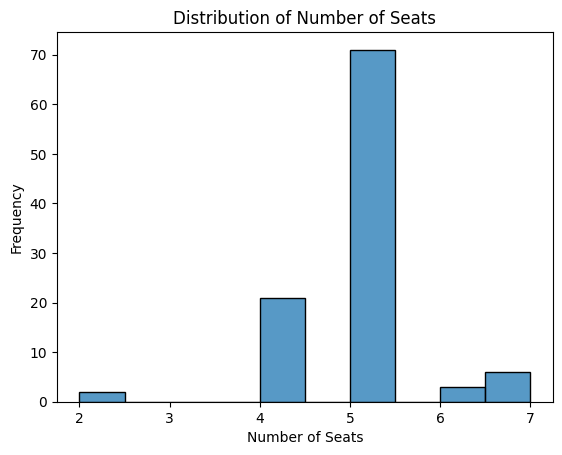

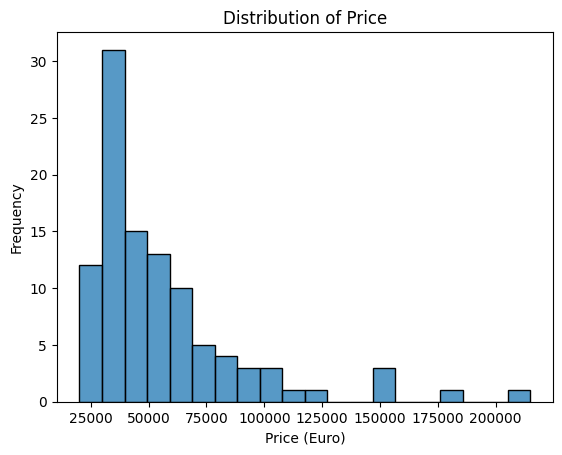

In [25]:
sns.histplot(data=data2, x='Seats', bins=10)
plt.xlabel('Number of Seats')
plt.ylabel('Frequency')
plt.title('Distribution of Number of Seats')
plt.show()

sns.histplot(data=data2, x='PriceEuro', bins=20)
plt.xlabel('Price (Euro)')
plt.ylabel('Frequency')
plt.title('Distribution of Price')
plt.show()

## Top Brands by Count:

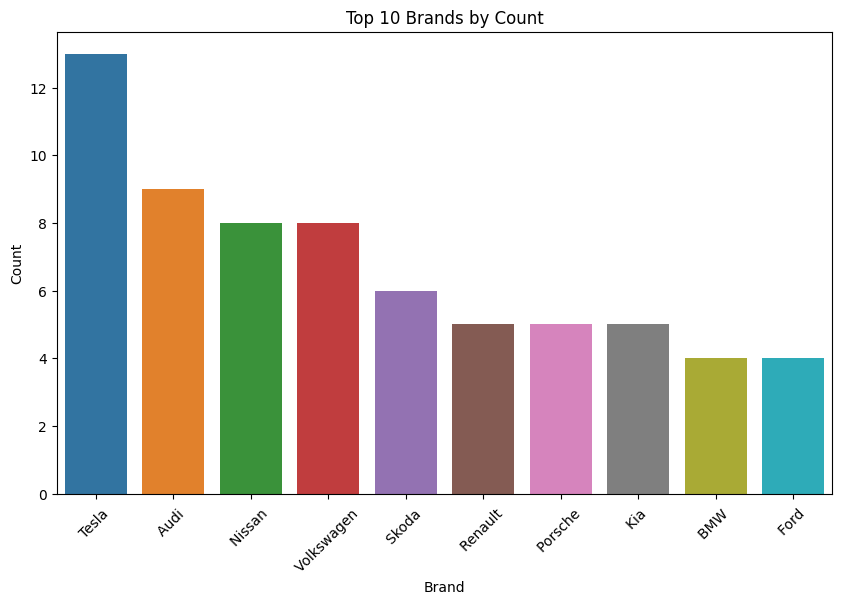

In [26]:
top_brands = data2['Brand'].value_counts().head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_brands.index, y=top_brands.values)
plt.xlabel('Brand')
plt.ylabel('Count')
plt.title('Top 10 Brands by Count')
plt.xticks(rotation=45)
plt.show()


## Top Segments by Count:

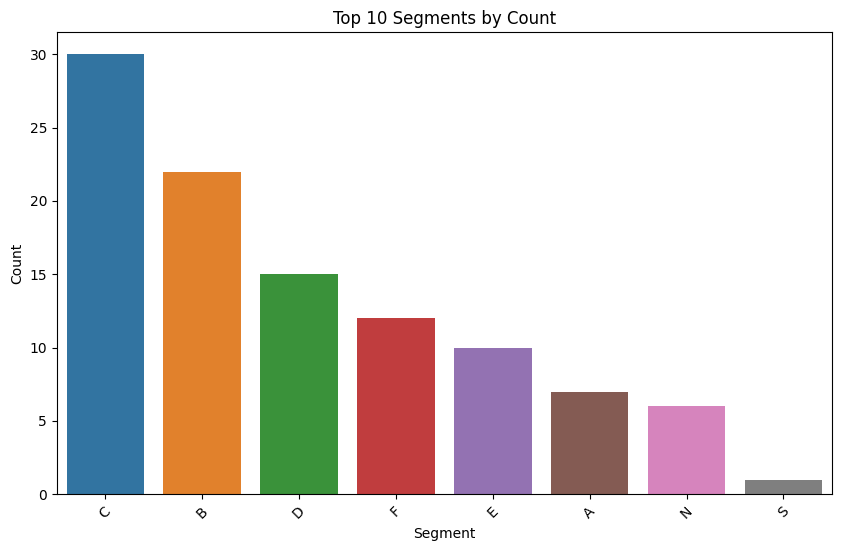

In [27]:
top_segments = data2['Segment'].value_counts().head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_segments.index, y=top_segments.values)
plt.xlabel('Segment')
plt.ylabel('Count')
plt.title('Top 10 Segments by Count')
plt.xticks(rotation=45)
plt.show()


## Correlation Heatmap:

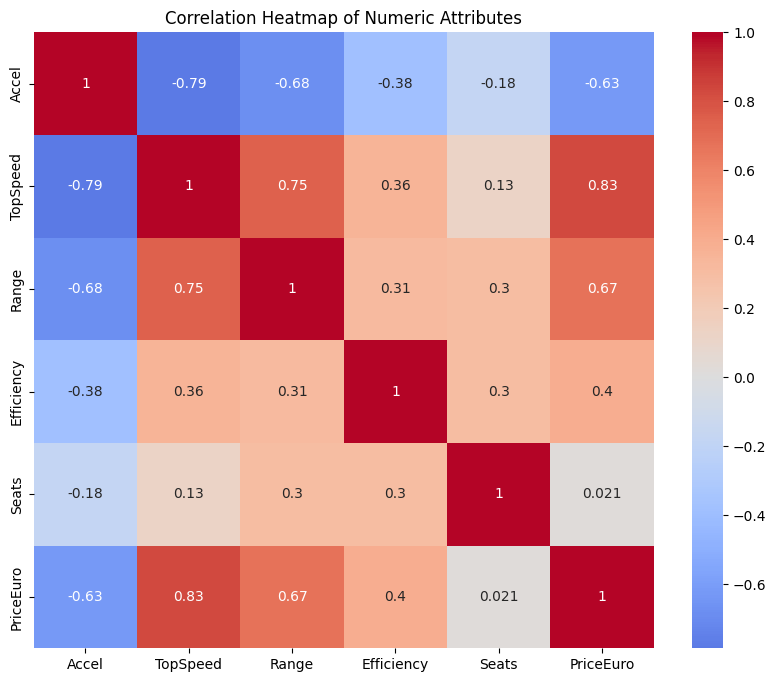

In [28]:
numeric_cols = ['Accel', 'TopSpeed', 'Range', 'Efficiency', 'Seats', 'PriceEuro']
numeric_df = data2[numeric_cols]
correlation_matrix = numeric_df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap of Numeric Attributes')
plt.show()


## Box Plot of Price by Segment:

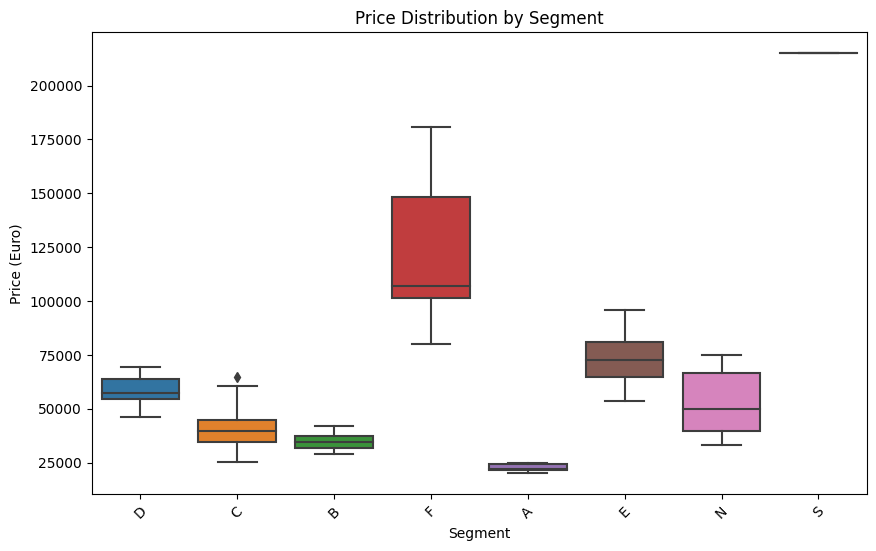

In [29]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=data2, x='Segment', y='PriceEuro')
plt.xlabel('Segment')
plt.ylabel('Price (Euro)')
plt.title('Price Distribution by Segment')
plt.xticks(rotation=45)
plt.show()


## Plot of Range vs Efficiency:

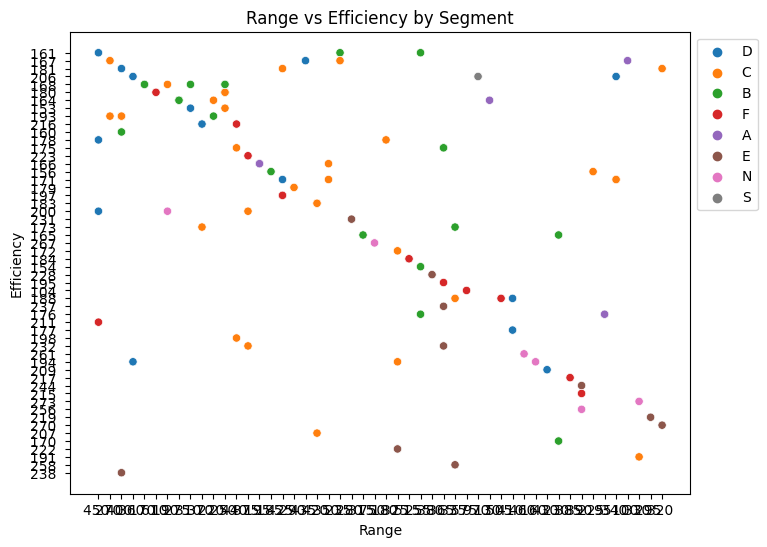

In [30]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=data2, x='Range', y='Efficiency', hue='Segment')
plt.xlabel('Range')
plt.ylabel('Efficiency')
plt.title('Range vs Efficiency by Segment')
plt.legend(bbox_to_anchor=(1, 1))
plt.show()
